<a href="https://colab.research.google.com/github/HongJeongHwan/MachineLearning/blob/main/%EC%8B%A4%EC%8A%B501_%EB%B6%93%EA%BD%83%ED%92%88%EC%A2%85%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##■ 데이터 불러오기

In [ ]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

# 데이터 가져오기 --> DataFrame 자료형 생성
file_path = '/content/drive/MyDrive/KDT/03. 정형데이터분석시각화/02. Data파일/iris_dataset.csv'
df_iris = pd.read_csv(file_path)

# 결과 확인
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


##■ 데이터 전처리

In [ ]:
# 붓꽃 품종의 label --> 숫자로 변환 --> Encoding((one hot / replace를 통한 방법))

# no.unique() --> 품종의 종류 --> 알파벳 순으로 추출
kinds = np.unique(df_iris.label)
print(f'붓꽃의 품종 확인 : {kinds}\n')

# replace() 사용 --> label encoding
df = df_iris.replace({kinds[0]:0,kinds[1]:1,kinds[2]:2})

# 결과 확인
df

붓꽃의 품종 확인 : ['setosa' 'versicolor' 'virginica']



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## ■ 모델링

###*→* 학습용 / 평가용 데이터 생성 : train_test_split

In [ ]:
# 데이터 --> 75:25(default) 비율로 학습용 데이터와 평가용 데이터 생성

# 필요한 함수 임포트
from sklearn.model_selection import train_test_split

# X Data와 y Data 생성
'''
# X 데이터 : 분류에 사용할 특성(feature) --> 꽃받침의 길이, 너비, 꽃잎의 길이, 너비
# y 데이터 : 정답 레이블
'''
X_data = df.iloc[:,0:4]
# X_data = df.drop(columns=['label'])
# y_data = df.iloc[:,4]
y_data = df.iloc[:,-1]

# 결과 확인
print(f'X_data :\n{X_data}\n')
print(f'y_data :\n{y_data}\n')

# train_test_split() 사용해서 데이터 분리하기
# X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.25,random_state=0)

# stratify를 통한 데이터의 편향성 제거
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,test_size=0.25,random_state=0, stratify=y_data)


X_data :
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

y_data :
0      0
1      0
2  

In [ ]:
# 학습용 데이터 확인 : 문제와 정답의 인덱스가 동일한지 반드시 확인필요

print(f'X_train :\n{X_train}\n')
print(f'X_train 자료형 :\n{type(X_train)}\n')
print(f'X_train 모양 :\n{X_train.shape}\n')

print(f'y_train :\n{y_train}\n')
print(f'y_train 자료형 :\n{type(y_train)}\n')
print(f'y_train 모양 :\n{y_train.shape}\n')

X_train :
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
60                 5.0               2.0                3.5               1.0
1                  4.9               3.0                1.4               0.2
8                  4.4               2.9                1.4               0.2
93                 5.0               2.3                3.3               1.0
106                4.9               2.5                4.5               1.7
..                 ...               ...                ...               ...
66                 5.6               3.0                4.5               1.5
29                 4.7               3.2                1.6               0.2
130                7.4               2.8                6.1               1.9
141                6.9               3.1                5.1               2.3
111                6.4               2.7                5.3               1.9

[112 rows x 4 columns]

X_train 자료형 :
<class 'pandas.

In [ ]:
# 학습용/평가용 --> 정답의 비율 확인
# 학습용
print(y_train.value_counts(normalize=True))
# 평가용
print(y_test.value_counts(normalize=True))

2    0.339286
1    0.330357
0    0.330357
Name: label, dtype: float64
0    0.342105
1    0.342105
2    0.315789
Name: label, dtype: float64


###*→* DecisionTreeClassfier 모델을 이용한 분류

####ㄴ 모델 생성

In [ ]:
# 필요한 함수 임포트
from sklearn.tree import DecisionTreeClassifier

# 모델 생성함수 호출, 모델생성
dt = DecisionTreeClassifier(random_state=0)

In [ ]:
# 보충 : 학습전 plot_tree 또는 predict 함수 사용 --> 불가능

pred_train = dt.predict(X_train)
print(f'학습 전 모델에 대한 예측 :\n{pred_train}\n') # <-- instance is not fitted yet. 에러 발생

####ㄴ 모델 학습

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

####ㄴ 모델 학습시 생성된 트리구조 시각화

[Text(0.5, 0.9, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 112\nvalue = [37, 37, 38]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5769230769230769, 0.7, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 75\nvalue = [0, 37, 38]'),
 Text(0.3076923076923077, 0.5, 'petal length (cm) <= 4.95\ngini = 0.142\nsamples = 39\nvalue = [0, 36, 3]'),
 Text(0.15384615384615385, 0.3, 'petal width (cm) <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.3, 'petal width (cm) <= 1.55\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8461538461538461, 0.5, 'petal length (cm) <= 4.85\ngini = 0.054\nsampl

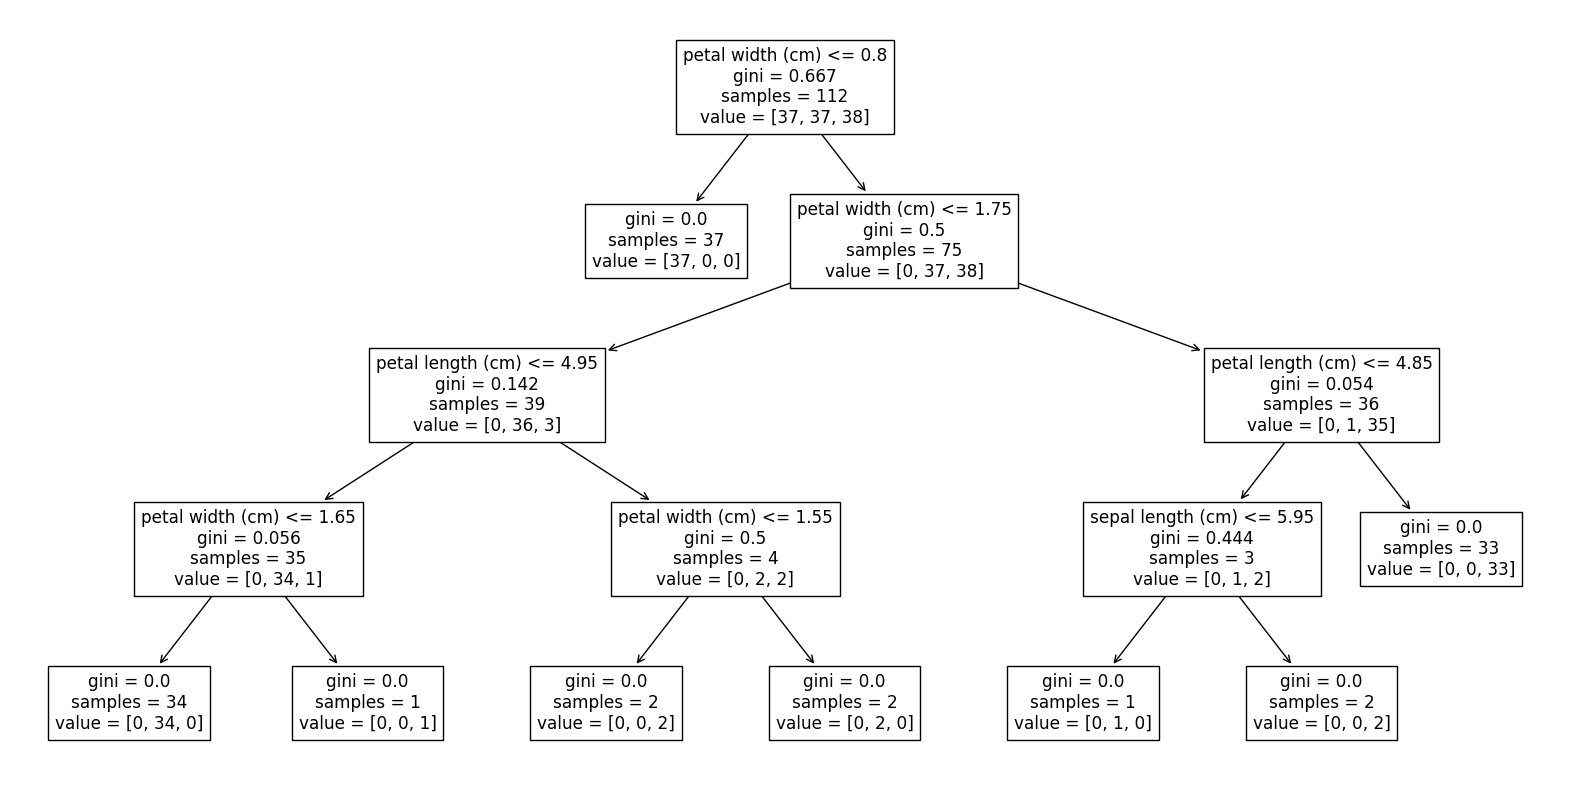

In [ ]:
# 필요한 함수 임포트
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 이미지의 크기 설정
plt.figure(figsize=(20,10))

# 함수 호출
plot_tree(dt,feature_names=X_train.columns)


####ㄴ 학습용/평가용 데이터를 이용한 예측

In [ ]:
# 학습용 데이터에 대해서 예측하기 --> predict(data)
pred_train = dt.predict(X_train)

# 결과 확인하기
print(pred_train)
# pred_train==y_train

[1 0 0 1 2 2 1 0 1 0 0 1 0 2 0 1 1 1 1 2 2 1 0 2 2 2 2 1 1 2 2 2 1 0 0 2 2
 1 1 2 2 0 0 1 0 1 2 0 0 2 1 2 1 0 0 0 0 2 0 1 1 1 2 0 1 1 0 1 2 1 2 0 1 2
 2 1 2 0 1 0 0 2 1 2 0 0 0 0 0 1 2 2 2 0 2 0 2 0 1 1 1 1 0 2 2 0 1 1 0 2 2
 2]


In [ ]:
# 학습용 데이터 정답
print(y_train.values)

[1 0 0 1 2 2 1 0 1 0 0 1 0 2 0 1 1 1 1 2 2 1 0 2 2 2 2 1 1 2 2 2 1 0 0 2 2
 1 1 2 2 0 0 1 0 1 2 0 0 2 1 2 1 0 0 0 0 2 0 1 1 1 2 0 1 1 0 1 2 1 2 0 1 2
 2 1 2 0 1 0 0 2 1 2 0 0 0 0 0 1 2 2 2 0 2 0 2 0 1 1 1 1 0 2 2 0 1 1 0 2 2
 2]


In [ ]:
# 학습용 데이터에 대한 예측 정확도 측정 --> 비교 연산
bool_arry = (y_train.values==pred_train)
print(f'비교 연산의 결과 :\n{bool_arry}\n')

# 정확도 측정
num_tot = pred_train.size
print(f'전체 데이터의 개수 = {num_tot}개\n')

num_true = bool_arry.sum()
print(f'학습용 데이터에 대한 예측의 결과 True인 개수 = {num_true}')

accuracy = (num_true / num_tot) * 100
print(f'학습용 데이터에 대한 정확도 = {accuracy}%')


비교 연산의 결과 :
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]

전체 데이터의 개수 = 112개

학습용 데이터에 대한 예측의 결과 True인 개수 = 112
학습용 데이터에 대한 정확도 = 100.0%


In [ ]:
# 평가용 데이터에 대해서 예측하기 --> predict(data)

pred_test = dt.predict(X_test)

# 결과 확인
print(pred_test)

[0 0 0 0 1 1 1 0 1 1 2 2 1 2 1 0 0 2 0 1 2 1 1 0 2 0 0 1 2 1 0 1 2 2 0 1 2
 2]


In [ ]:
# 평가용 정답 확인
print(y_test.values)

[0 0 0 0 1 1 1 0 1 2 2 2 1 2 1 0 0 2 0 1 2 1 1 0 2 0 0 1 2 1 0 1 2 2 0 1 2
 2]


In [ ]:
# 평가용 데이터에 대한 예측 정확도 측정 --> 비교 연산
bool_arry = (y_test.values==pred_test)
print(f'비교 연산의 결과 :\n{bool_arry}\n')

# 정확도 측정
num_tot = pred_test.size
print(f'전체 데이터의 개수 = {num_tot}개\n')

num_true = bool_arry.sum()
print(f'평가용 데이터에 대한 예측의 결과 True인 개수 = {num_true}')

accuracy = (num_true / num_tot) * 100
print(f'평가용 데이터에 대한 정확도 = {accuracy}%')


비교 연산의 결과 :
[ True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]

전체 데이터의 개수 = 38개

평가용 데이터에 대한 예측의 결과 True인 개수 = 37
평가용 데이터에 대한 정확도 = 97.36842105263158%


####ㄴ 모델 평가

In [ ]:
# 정확도를 평가하기 위해서 필요한 라이브러리 임포트
from sklearn.metrics import accuracy_score

# 학습용 데이터에 대한 정확도 평가
print(f'학습용 데이터에 대한 정확도 평가 : {accuracy_score(y_true=y_train, y_pred=pred_train)}\n')

# 평가용 데이터에 대한 정확도 평가
print(f'평가용 데이터에 대한 정확도 평가 : {accuracy_score(y_test,pred_test):0.4f}\n')


학습용 데이터에 대한 정확도 평가 : 1.0

평가용 데이터에 대한 정확도 평가 : 0.9737



In [ ]:
# DecisionTreeClassifier의 깊이(max_depth) 확인
dt.get_depth()

4